In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('DISDATAV.csv')
df.head(10)

,MQ3,MQ2,MQ6,MQ5,MQ135,MQ4,MQ8,MQ9,HUM,TEMPC,TEMPF,TARGET
0,393,1859,1713,2063,1705,715,173,354,55.60\n%,28.7,83.66,0
1,388,1860,1691,2062,1706,720,240,357,55.60\n%,28.7,83.66,0
2,400,1861,1685,2059,1707,720,131,362,55.60\n%,28.7,83.66,0
3,398,1859,1693,2047,1709,720,171,357,55.70\n%,28.7,83.66,0
4,394,1847,1686,2064,1703,720,166,357,55.70\n%,28.7,83.66,0
5,381,1856,1690,2060,1702,703,169,355,55.60\n%,28.7,83.66,0
6,391,1841,1689,2057,1698,720,163,354,55.60\n%,28.7,83.66,0
7,391,1840,1686,2053,1691,717,163,360,55.50\n%,28.7,83.66,0
8,400,1837,1689,2045,1699,717,167,357,55.50\n%,28.7,83.66,0
9,304,1841,1671,2047,1702,719,170,343,55.40\n%,28.7,83.66,0


In [ ]:
df.isnull().sum()

,0
MQ3,0
MQ2,0
MQ6,0
MQ5,0
MQ135,0
MQ4,0
MQ8,0
MQ9,0
HUM,2
TEMPC,2


In [ ]:
for col in df.columns:
    if df[col].dtype != 'object':  # Check if the column is numeric
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        # Handle non-numeric columns (e.g., fill with mode or a constant)
        df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

,0
MQ3,0
MQ2,0
MQ6,0
MQ5,0
MQ135,0
MQ4,0
MQ8,0
MQ9,0
HUM,0
TEMPC,0


In [ ]:
from sklearn.utils import shuffle

In [ ]:
df = shuffle(df)
df.head()

,MQ3,MQ2,MQ6,MQ5,MQ135,MQ4,MQ8,MQ9,HUM,TEMPC,TEMPF,TARGET
12318,890,2619,1984,2058,1338,1639,1915,2082,79.30\n%,25.8,78.44,7
9502,603,4073,2160,2311,643,546,1475,2737,52.40\n%,29.1,84.38,5
10042,518,3661,1942,2094,762,563,1316,2334,56.30\n%,28.4,83.12,6
9312,727,4095,2149,2304,714,641,1657,2795,54.70\n%,29.1,84.38,5
5251,330,2855,1904,2589,1861,880,640,431,60.40\n%,29.1,84.38,3


In [ ]:
X = df.drop(['TARGET'], axis = 1)
X = np.array(X)
Y = np.array(df['TARGET'])
X[:10], Y[:10]

(array([[890, 2619, 1984, 2058, 1338, 1639, 1915, 2082, '79.30\n%', 25.8,
         78.44],
        [603, 4073, 2160, 2311, 643, 546, 1475, 2737, '52.40\n%', 29.1,
         84.38],
        [518, 3661, 1942, 2094, 762, 563, 1316, 2334, '56.30\n%', 28.4,
         83.12],
        [727, 4095, 2149, 2304, 714, 641, 1657, 2795, '54.70\n%', 29.1,
         84.38],
        [330, 2855, 1904, 2589, 1861, 880, 640, 431, '60.40\n%', 29.1,
         84.38],
        [731, 3570, 1712, 2109, 1883, 751, 321, 355, '53.50\n%', 27.3,
         81.14],
        [483, 3525, 1920, 2063, 748, 551, 1327, 2278, '58.70\n%', 28.3,
         82.94],
        [965, 3193, 2195, 2242, 1277, 1687, 1781, 2105, '73.70\n%', 26.3,
         79.34],
        [391, 1841, 1689, 2057, 1698, 720, 163, 354, '55.60\n%', 28.7,
         83.66],
        [213, 1453, 1649, 1833, 1407, 679, 134, 318, '53.40\n%', 30.2,
         86.36]], dtype=object),
 array([7, 5, 6, 5, 3, 4, 6, 1, 0, 0]))

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical # Import from tensorflow.keras instead

In [ ]:
l_encode = LabelEncoder()
l_encode.fit(Y)
Y = l_encode.transform(Y)
Y = to_categorical(Y)
Y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
Y.shape

(12650, 8)

In [ ]:
# Convert potential string columns with percentages to numeric
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is of object type (likely string)
        try:
            df[col] = df[col].str.rstrip('%').astype(float) / 100.0  # Remove '%' and convert to float
        except:
            pass  # Handle cases where conversion might not be applicable

X = df.drop(['TARGET'], axis=1)
X = np.array(X)
Y = np.array(df['TARGET'])

# Now proceed with scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[ 1.10568427, -0.43480834,  0.62451834, ...,  1.71862581,
        -1.22991608, -1.22991608],
       [-0.00354962,  1.16279443,  1.63281328, ..., -0.91850052,
         0.83514482,  0.83514482],
       [-0.33206837,  0.71010369,  0.3839025 , ..., -0.53616622,
         0.3971016 ,  0.3971016 ],
       ...,
       [-0.23931013,  1.18696724,  1.91353176, ..., -0.92830396,
         0.77256721,  0.77256721],
       [-0.49053035,  0.19368464, -1.64987423, ..., -0.57537999,
         2.14927448,  2.14927448],
       [-1.09345888, -1.15339996, -0.93375566, ..., -0.19304569,
        -0.85445046, -0.85445046]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(scaled_X,Y, test_size = 0.3, random_state = 1)
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((8855, 11), (8855,), (3795, 11), (3795,))

In [ ]:
train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
test_x = test_x.reshape((test_x.shape[0], test_x.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import SimpleRNN # Changed simpleRNN to SimpleRNN
import tensorflow as tf

In [ ]:
model = Sequential()
model.add(SimpleRNN(100, input_shape=(train_x.shape[1], 1)))  # Use SimpleRNN layer directly
model.add(Dropout(0.2))
num_classes = len(np.unique(train_y))  # Determine the number of unique classes in your target variable
model.add(Dense(num_classes, activation='softmax'))  # Set the output dimension to the number of classes

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 100)                 │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │             808 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,008 (43.00 KB)

 Trainable params: 11,008 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

# ... (your existing code) ...

# One-hot encode test_y as well
test_y_encoded = encoder.transform(test_y.reshape(-1, 1))

# Fit the model using the one-hot encoded labels
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(train_x, train_y_encoded, epochs=50, batch_size=32,
                    callbacks=[callback], validation_data=(test_x, test_y_encoded)) # Use test_y_encoded

Epoch 1/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9994 - loss: 0.0094 - val_accuracy: 0.9997 - val_loss: 0.0023
Epoch 2/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9996 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 3/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9993 - loss: 0.0039 - val_accuracy: 1.0000 - val_loss: 8.9611e-04
Epoch 4/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9993 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 5.2123e-04
Epoch 5/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9988 - loss: 0.0034 - val_accuracy: 0.9997 - val_loss: 0.0023
Epoch 6/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9999 - loss: 9.7654e-04 - val_accuracy: 1.0000 - val_loss: 4.6758e-04
Epoch 7/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 3.8847e-04 - val_accuracy: 1.0000 - val_loss: 3.3732e-04
Epoch 8/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2

In [ ]:
model.save("rnn.keras")  # Save the model with the .keras extension
# or
model.save("rnn.h5")    # Save the model with the .h5 extension

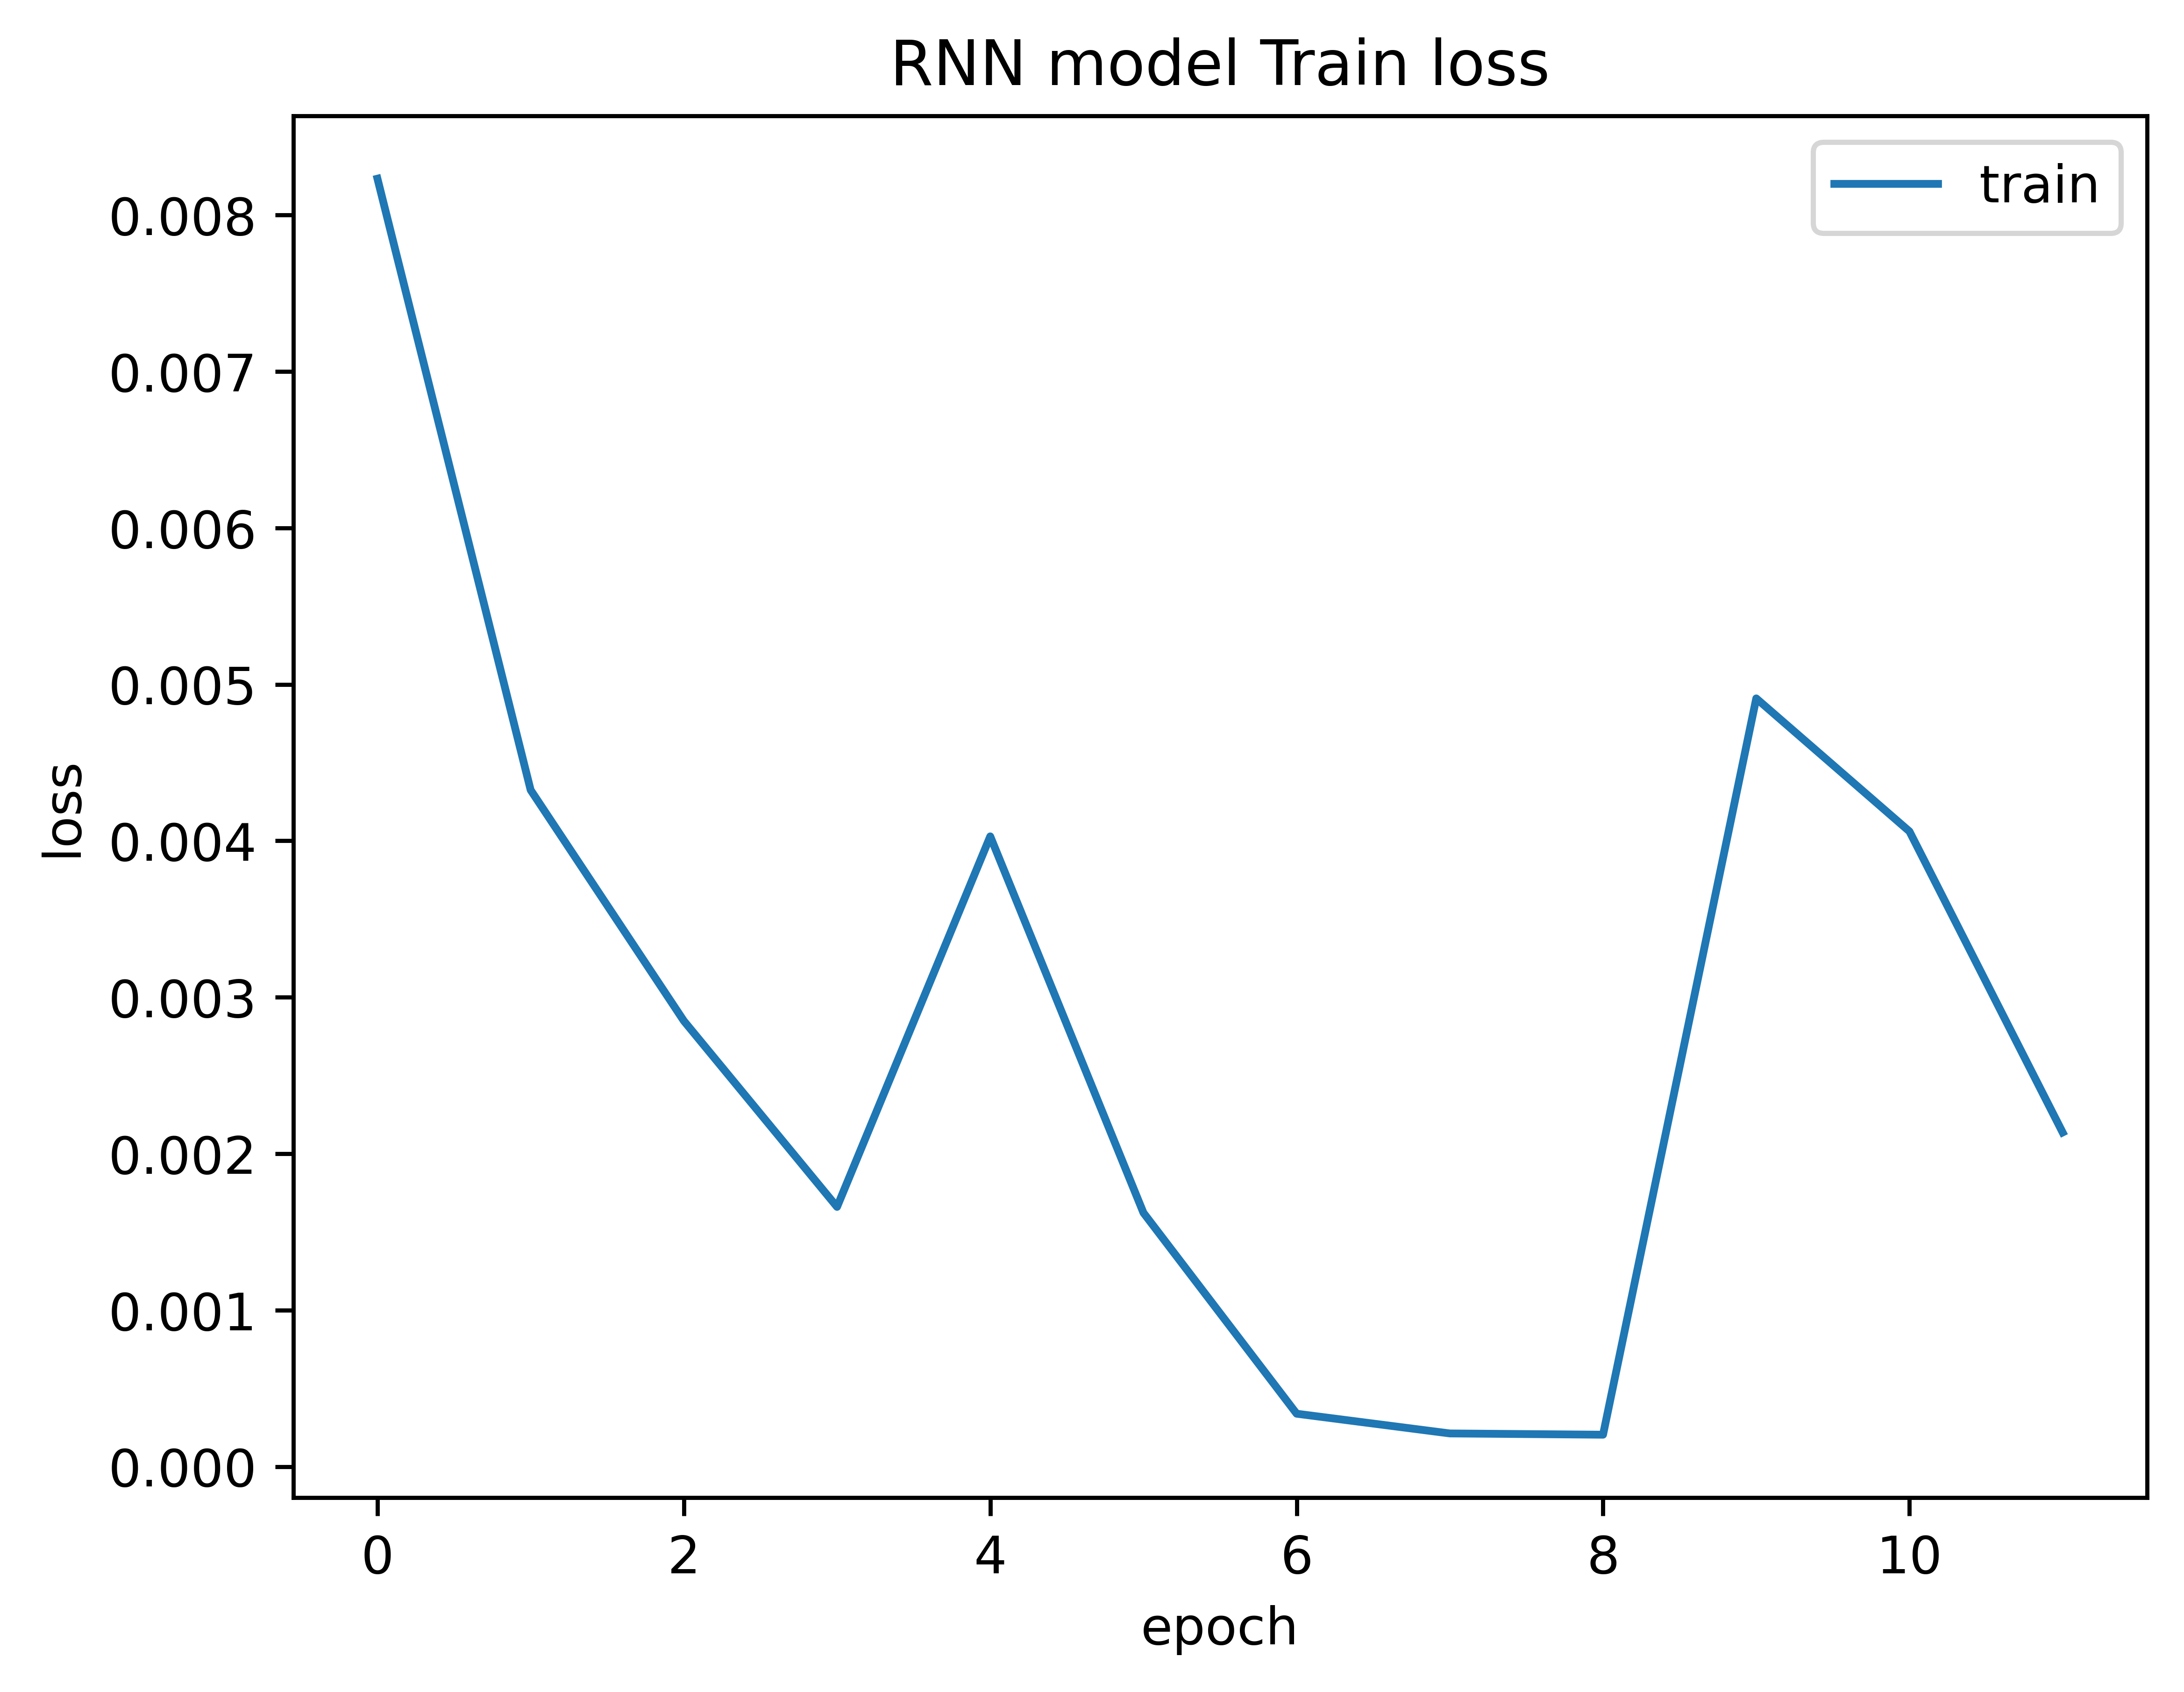

In [ ]:
plt.rcParams['figure.dpi'] = 800
plt.plot(history.history['loss'])
plt.title('RNN model Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.savefig("RNN_model_train_loss.pdf", format="pdf", bbox_inches="tight")
plt.show()

# include Test loss in graph
# check for exclusive another for test loss

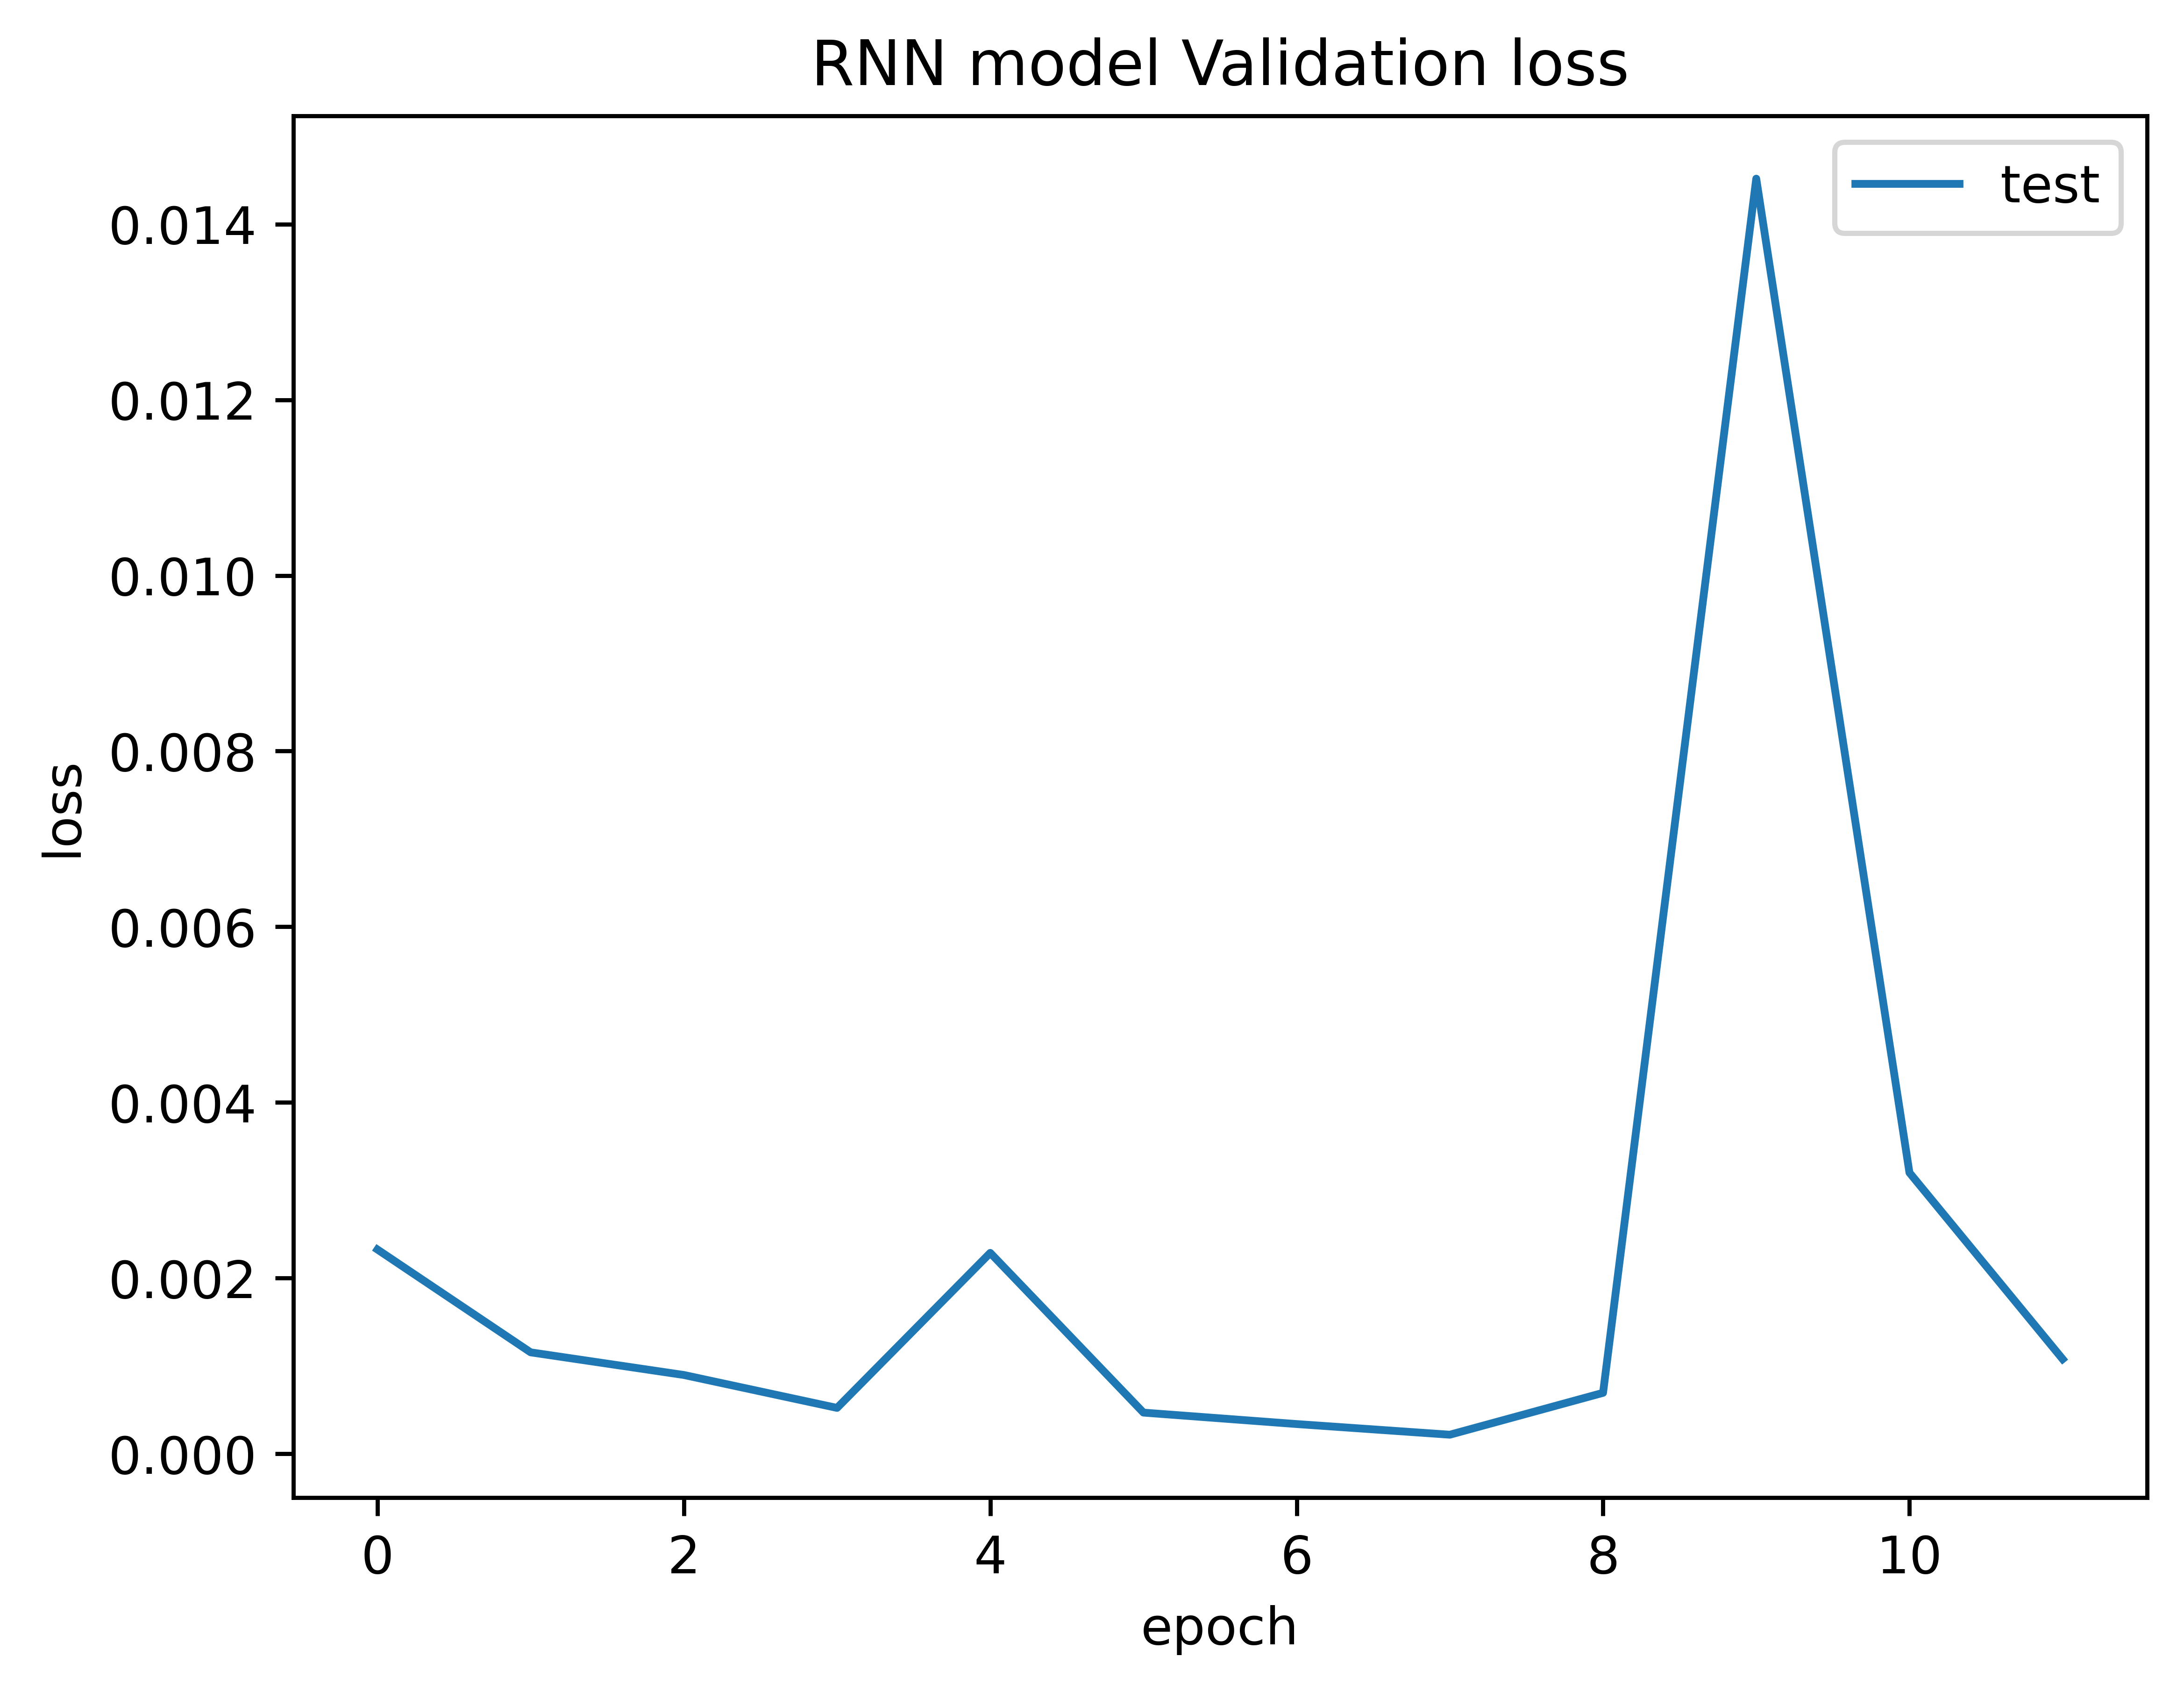

In [ ]:
plt.rcParams['figure.dpi'] = 800
plt.plot(history.history['val_loss'])
plt.title('RNN model Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper right')
plt.savefig("RNN_model_val_loss.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
# One-hot encode test_y to match the model's output format
test_y_encoded = encoder.transform(test_y.reshape(-1, 1))

# Evaluate the model using the one-hot encoded labels
scores = model.evaluate(test_x, test_y_encoded)

for i, m in enumerate(model.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9993 - loss: 0.0020

loss: 0.001

compile_metrics: 0.999


In [ ]:
predict_x=model.predict(test_x)
pred_=np.argmax(predict_x,axis=1)

# The argmax output is already 1D, no need for further indexing
true_y = l_encode.inverse_transform(np.argmax(to_categorical(test_y[:]), axis = 1))

cnt = 0
for i,j in zip(pred_, true_y):
    print("Predicted: {}, True: {}".format(i, j))
    cnt = cnt+1
    if cnt > 100:
        break

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted: 1, True: 1
Predicted: 1, True: 1
Predicted: 0, True: 0
Predicted: 4, True: 4
Predicted: 7, True: 7
Predicted: 5, True: 5
Predicted: 5, True: 5
Predicted: 1, True: 1
Predicted: 7, True: 7
Predicted: 4, True: 4
Predicted: 3, True: 3
Predicted: 0, True: 0
Predicted: 7, True: 7
Predicted: 6, True: 6
Predicted: 2, True: 2
Predicted: 2, True: 2
Predicted: 0, True: 0
Predicted: 0, True: 0
Predicted: 0, True: 0
Predicted: 7, True: 7
Predicted: 0, True: 0
Predicted: 7, True: 7
Predicted: 7, True: 7
Predicted: 0, True: 0
Predicted: 0, True: 0
Predicted: 4, True: 4
Predicted: 3, True: 3
Predicted: 7, True: 7
Predicted: 0, True: 0
Predicted: 3, True: 3
Predicted: 5, True: 5
Predicted: 1, True: 1
Predicted: 0, True: 0
Predicted: 7, True: 7
Predicted: 2, True: 2
Predicted: 1, True: 1
Predicted: 3, True: 3
Predicted: 0, True: 0
Predicted: 6, True: 6
Predicted: 2, True: 2
Predicted: 0, True: 0
Predicted: 3, True: 3
Predicted: 6, True: 6
Predicted: 5,

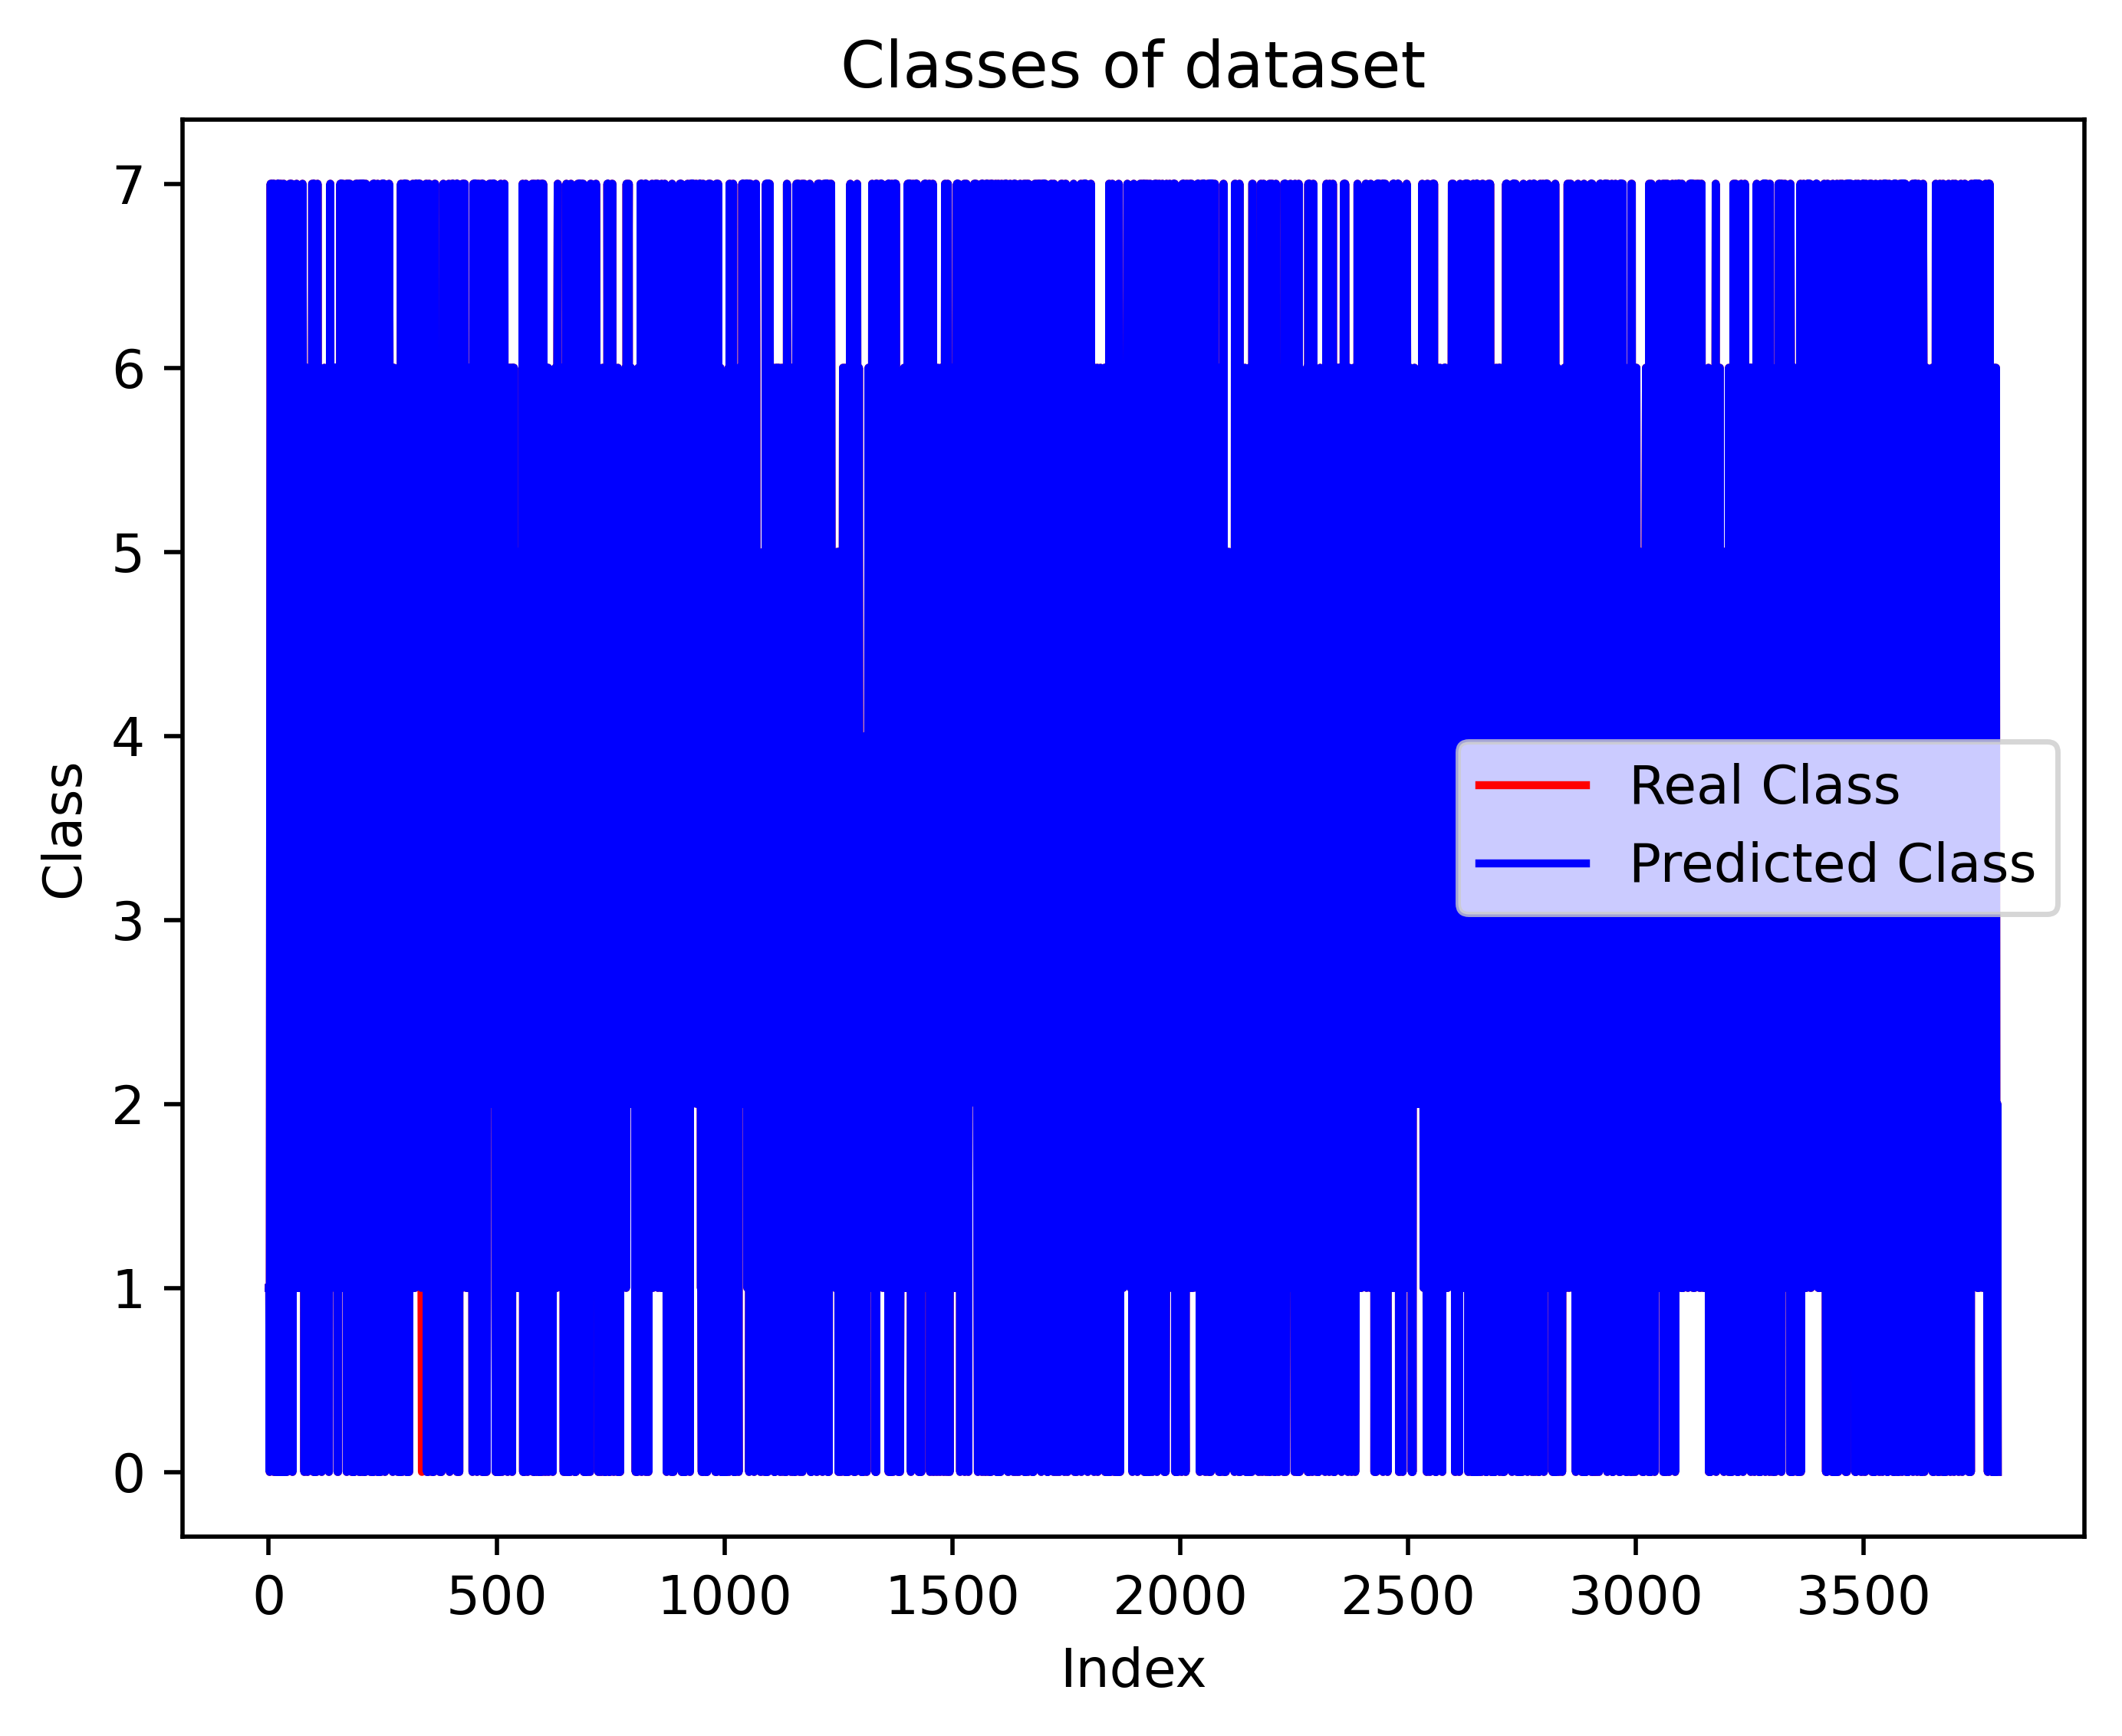

In [ ]:
plt.rcParams['figure.dpi'] = 500
plt.plot(true_y, color = 'red', label = 'Real Class')
plt.plot(pred_, color = 'blue', label = 'Predicted Class')
plt.title('Classes of dataset')
plt.xlabel('Index')
plt.ylabel('Class')
plt.legend()
plt.show()

In [ ]:
test_y[:20]

array([1, 1, 0, 4, 7, 5, 5, 1, 7, 4, 3, 0, 7, 6, 2, 2, 0, 0, 0, 7])

In [ ]:
test_x[:20]

array([[[ 1.3878239 ],
        [ 0.18599329],
        [ 1.83905543],
        [ 0.56807872],
        [-0.3039341 ],
        [ 1.6791335 ],
        [ 1.15131364],
        [ 0.79936175],
        [ 1.82646369],
        [-0.91702807],
        [-0.91702807]],

       [[ 1.43806794],
        [ 0.23324014],
        [ 1.43230009],
        [ 0.28568891],
        [-0.32903989],
        [ 1.80500628],
        [ 1.29597759],
        [ 0.77832409],
        [ 1.11081231],
        [-1.41764889],
        [-1.41764889]],

       [[-1.48768138],
        [-1.7126708 ],
        [-1.16864255],
        [-1.21638454],
        [ 0.08311358],
        [-0.62090551],
        [-1.2751631 ],
        [-1.08981996],
        [-0.75184198],
        [ 1.46092085],
        [ 1.46092085]],

       [[ 0.30177957],
        [ 1.18696724],
        [-0.38950555],
        [ 0.15951474],
        [ 1.72754317],
        [-0.24099857],
        [-0.65922278],
        [-0.95517895],
        [-0.75184198],
        [-0.79187286],
     

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(true_y, pred_))
mse = mean_squared_error(true_y, pred_)
mae = mean_absolute_error(true_y, pred_)
r2 = r2_score(true_y, pred_)
print("TEST RMSE:", rmse)
print("TEST MSE:", mse)
print("TEST MAE:", mae)
print("TEST R2:", r2)

TEST RMSE: 0.05852828331071293
TEST MSE: 0.0034255599472990776
TEST MAE: 0.0013175230566534915
TEST R2: 0.9993507847549654


In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
cm = confusion_matrix(true_y, pred_,normalize='pred')
print(cm)

[[1.         0.         0.00217865 0.00196078 0.         0.
  0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.99782135 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.99803922 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.        ]]


In [ ]:
cm_num = confusion_matrix(true_y, pred_)
print(cm_num)

[[493   0   1   1   0   0   0   0]
 [  0 499   0   0   0   0   0   0]
 [  0   0 458   0   0   0   0   0]
 [  0   0   0 509   0   0   0   0]
 [  0   0   0   0 499   0   0   0]
 [  0   0   0   0   0 410   0   0]
 [  0   0   0   0   0   0 446   0]
 [  0   0   0   0   0   0   0 479]]


In [ ]:
import seaborn as sns

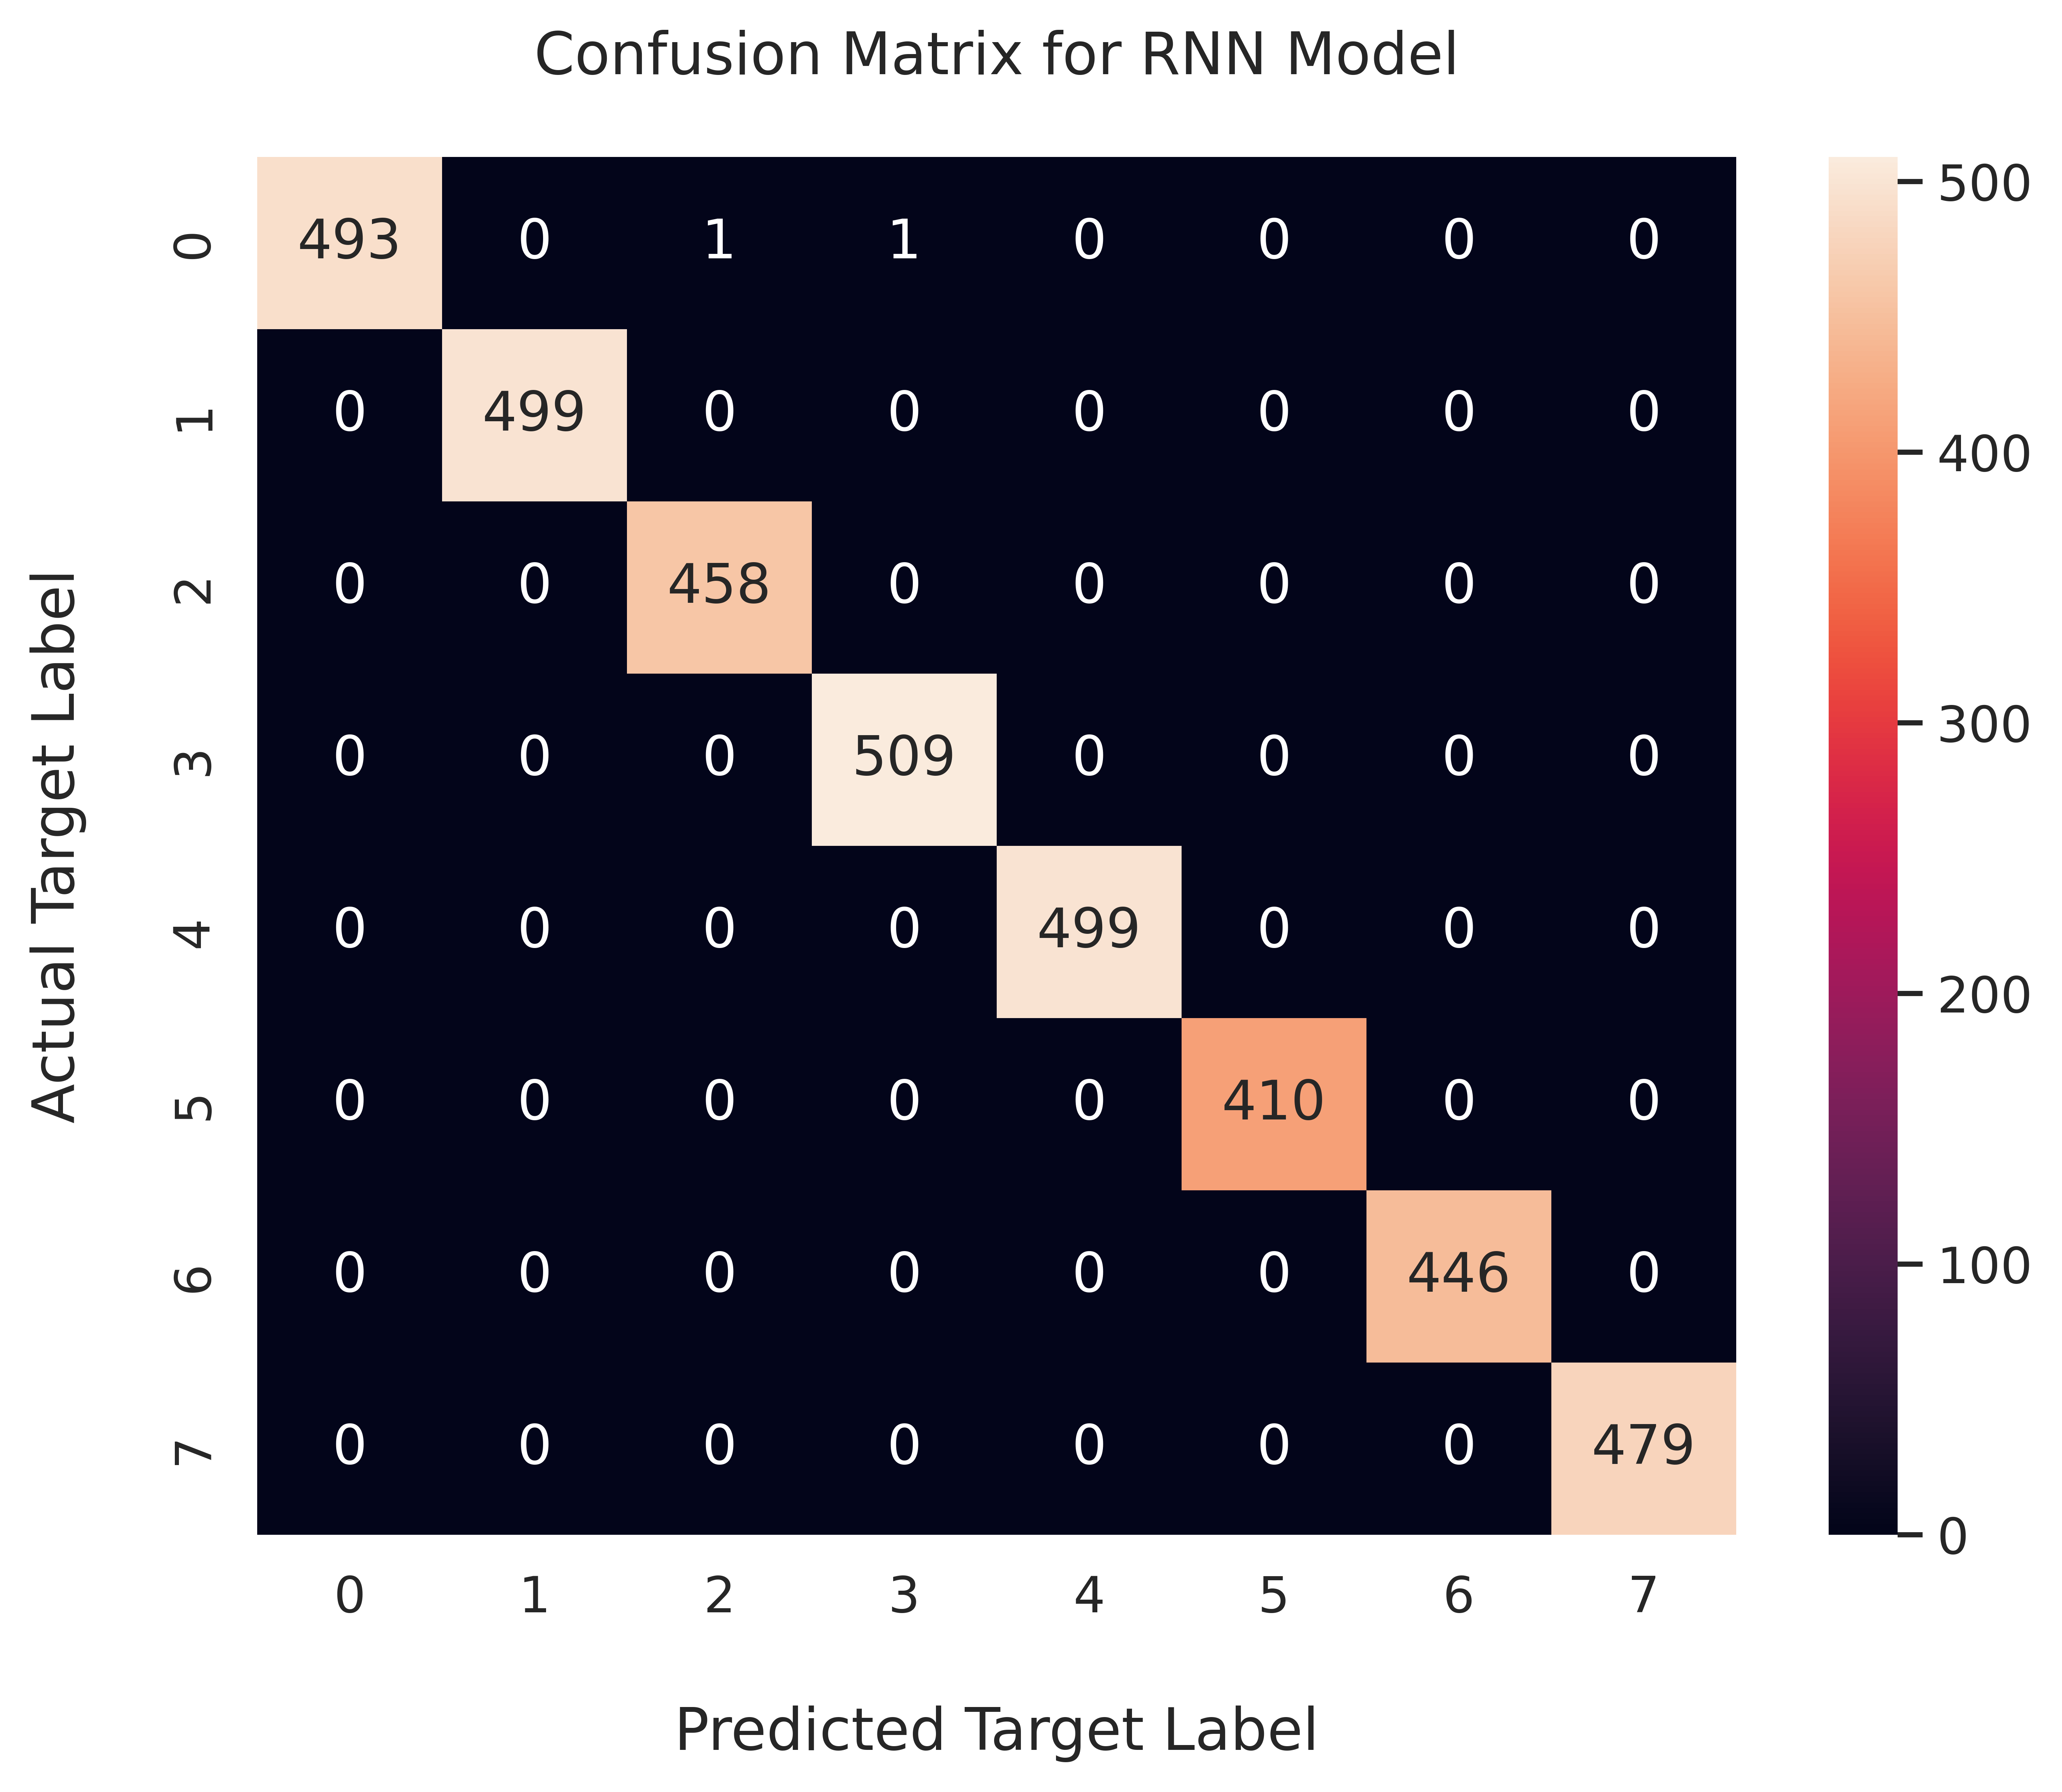

In [ ]:
# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=800)
# Scale up the size of all text
sns.set(font_scale = 1.1)

# Target labels
labels = ['0', '1', '2', '3', '4', '5', '6', '7']
# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers.
ax = sns.heatmap(cm_num, annot=True, fmt='d', )

# set x-axis label and ticks.
ax.set_xlabel("Predicted Target Label", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(labels)

# set y-axis label and ticks
ax.set_ylabel("Actual Target Label", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(labels)

# set plot title
ax.set_title("Confusion Matrix for RNN Model", fontsize=14, pad=20)

plt.savefig("CM_RNN.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(true_y, pred_)

print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       495
           1       1.00      1.00      1.00       499
           2       1.00      1.00      1.00       458
           3       1.00      1.00      1.00       509
           4       1.00      1.00      1.00       499
           5       1.00      1.00      1.00       410
           6       1.00      1.00      1.00       446
           7       1.00      1.00      1.00       479

    accuracy                           1.00      3795
   macro avg       1.00      1.00      1.00      3795
weighted avg       1.00      1.00      1.00      3795

